# Regularized Linear regression

the value of the parameters defined the importance of that feature in the dataset 

Consider this in every epoch the machine decrease error and propogates to overfitting there will be a time time where the error will be superless this means the model has become complex now to reduce the complexity we add a penalty term(error) to decrease the comlexity of the model

**Regularization is a technique to solve for overfitting of machine learning models** in other words it is a technique to reduce the complexity of the model.

In regularization we decrease the magnitude of the parameters which decrease the slope of the line and makes it towards being horizontal

Is it true that the L1 term in Lasso has the following purposes: performing feature selection, compensating for overfitting, and smoothing?

In this Lasso and Ridge regression as alpha value increases, the slope of the regression line reduces and becomes horizontal.

Yes that is true 

In Ridge regression, as the regularization parameter increases, the regression coefficients decrease?

False

Which of the following methods does not have closed form solution for its coefficients? 


Lasso Regression

For Lasso Regression, if the regularization parameter = 0, what does it mean?

The loss function is as same as the ordinary least square loss function

Which of the following is true about regularized regression?

Can help with bias trade-off

##  2

What’s the penalty term for the Ridge regression?

Is it true that the L1 term in Lasso has the following purposes: performing feature selection, compensating for overfitting, and smoothing?
    
With Lasso Regression the influence of the hyper parameter lambda, as lambda tends to zero the solution approaches to _________________
    
In Ridge regression, A hyper parameter is used called “_____________” that controls the weighting of the penalty to the loss function.
    
For Lasso Regression, if the regularization parameter is very high, which options are true?
    
- Can be used to select important features of a dataset
  Shrinks the coefficients of less important features to exactly 0

Which of the following of the coefficients is added as the penalty term to the loss function in Lasso regression?



# Let's starts 

It is a method to decrease the complexity of the model by introducing a penelty term 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [1]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston = load_boston()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
boston.data.ndim

2

In [4]:
Boston_data is  a 2d array lets extract the required data from the 2d array and make it into a dataframe

SyntaxError: invalid syntax (2940557327.py, line 1)

In [5]:
# extract input and response variables (housing prices), 
# meaning of each variable is in the link above
feature_num = 7
boston = load_boston()
X = boston.data[:, :feature_num]
y = boston.target
features = boston.feature_names[:feature_num]
pd.DataFrame(X, columns = features).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2


In [6]:
feature_num = 7

X = boston.data[:,:feature_num]
y = boston.target
features = boston.feature_names[:feature_num]
pd.DataFrame(X,columns =  features).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2


In [7]:
# this was just for our visualization thats it 

In [74]:
# spliting the data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

#transforming
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [9]:
# first lets run ridge for only one alpha
ridge = Ridge(alpha = 1,fit_intercept = True)
ridge.fit(X_train_std,y_train)
print(ridge.coef_)
print(ridge.intercept_)
y_train_predict = ridge.predict(X_train_std)
y_test_predict = ridge.predict(X_test_std)
mse = mean_squared_error(y_train,y_train_predict)
print(mse)

[-1.51276656  0.36105385 -0.91733106  1.06385188 -0.62817387  4.71557031
 -0.73545058]
22.52227722772274
34.802509505001375


In [10]:
# we will run the ridge regression for different alpha values

alphas = 10**np.arange(1,5)
print(f'Different values of alpha{alphas}')

ridge_weight = []
for alpha in alphas:
    ridge = Ridge(alpha = alpha, fit_intercept = True)
    ridge.fit(X_train_std,y_train)
    ridge_weight.append(ridge.coef_)
    

Different values of alpha[   10   100  1000 10000]


In [11]:
# this is a list of array 
ridge_weight 

[array([-1.49206312,  0.38727255, -0.93387489,  1.05398288, -0.64033294,
         4.60275953, -0.72225458]),
 array([-1.32026209,  0.5409517 , -1.00412817,  0.94713053, -0.71133473,
         3.74549749, -0.67442666]),
 array([-0.67983134,  0.5300704 , -0.73461892,  0.40136137, -0.61008556,
         1.44882275, -0.5468596 ]),
 array([-0.12773037,  0.12229641, -0.15851654,  0.05488282, -0.14166729,
         0.22574596, -0.12975011])]

In [12]:
def weight_versus_alpha_graph(weight,alphas,featuers):
    weight = np.array(weight)
    
    for i in range(len(weight.shape[0]))

SyntaxError: invalid syntax (4055363607.py, line 4)

In [13]:
def weight_versus_alpha_plot(weight, alphas, features):
    """
    Pass in the estimated weight, the alpha value and the names
    for the features and plot the model's estimated coefficient weight 
    for different alpha values
    """
    fig = plt.figure(figsize = (8, 6))
    
    # ensure that the weight is an array
    weight = np.array(weight)
    for col in range(weight.shape[1]):
        plt.plot(alphas, weight[:, col], label = features[col])

    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)
    
    # manually specify the coordinate of the legend
    plt.legend(bbox_to_anchor = (1.3, 0.9))
    plt.title('Coefficient Weight as Alpha Grows')
    plt.ylabel('Coefficient weight')
    plt.xlabel('alpha')
    return fig

In [14]:
weight_versus_alpha_plot(weight,alphas,features)

NameError: name 'weight' is not defined

In [ ]:
weight.shape

In [15]:
plt.plot(alphas,weight[:,1],label = features[0])
plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)


NameError: name 'weight' is not defined

In [16]:
weight = np.array(ridge_weight)

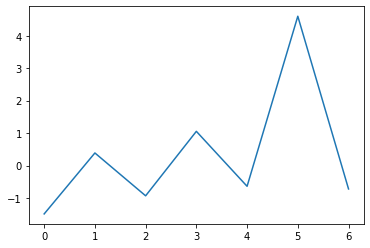

In [17]:
plt.plot(weight[0],label = features[0])

In [18]:
weight[0],features

(array([-1.49206312,  0.38727255, -0.93387489,  1.05398288, -0.64033294,
         4.60275953, -0.72225458]),
 array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE'], dtype='<U7'))

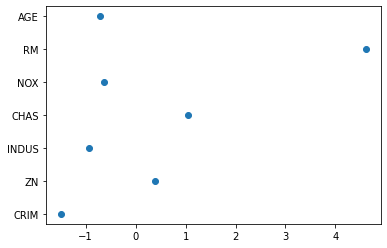

In [19]:
plt.scatter(weight[0],features)

ValueError: x and y must be the same size

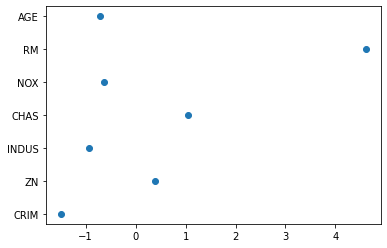

In [20]:
for i in range(weight.shape[0]):
    plt.scatter(weight[0,i:],features)

In [ ]:
weight[0,:]

In [ ]:
for i in range(4):
    print(weight[i][0])

In [ ]:
for i in len(alphas):
    print(i)

In [ ]:
for i in range(7):
    plt.plot(alphas,weight[:,i],label = features[i])

In [ ]:
weight[:,1]

In [ ]:
# this is what we are looping 
plt.plot(alphas,weight[:,0],label = features[0])
plt.plot(alphas,weight[:,1],label = features[1])
plt.plot(alphas,weight[:,2],label = features[2])
plt.plot(alphas,weight[:,3],label = features[3])
plt.plot(alphas,weight[:,4],label = features[4])
plt.plot(alphas,weight[:,5],label = features[5])
plt.plot(alphas,weight[:,6],label = features[6])


#let's understand now we are make feature vs alpha for every feature 

In [ ]:
weight

In [ ]:
weight[2,:]

In [ ]:
df=pd.DataFrame(weight,columns = features,index = [1,10,100,1000])
display(df)

In [ ]:
plt.plot(df.CRIM,)
plt.plot(df.ZN,)
plt.plot(df.INDUS,)
plt.plot(df.CHAS,)
plt.plot(df.NOX,)
plt.plot(df.RM,)
plt.plot(df.AGE,)

In [21]:
weight 

array([[-1.49206312,  0.38727255, -0.93387489,  1.05398288, -0.64033294,
         4.60275953, -0.72225458],
       [-1.32026209,  0.5409517 , -1.00412817,  0.94713053, -0.71133473,
         3.74549749, -0.67442666],
       [-0.67983134,  0.5300704 , -0.73461892,  0.40136137, -0.61008556,
         1.44882275, -0.5468596 ],
       [-0.12773037,  0.12229641, -0.15851654,  0.05488282, -0.14166729,
         0.22574596, -0.12975011]])

In [22]:
ridge_weight

[array([-1.49206312,  0.38727255, -0.93387489,  1.05398288, -0.64033294,
         4.60275953, -0.72225458]),
 array([-1.32026209,  0.5409517 , -1.00412817,  0.94713053, -0.71133473,
         3.74549749, -0.67442666]),
 array([-0.67983134,  0.5300704 , -0.73461892,  0.40136137, -0.61008556,
         1.44882275, -0.5468596 ]),
 array([-0.12773037,  0.12229641, -0.15851654,  0.05488282, -0.14166729,
         0.22574596, -0.12975011])]

In [23]:
weight = np.array(ridge_weight)

In [24]:
weight.ndim

2

In [25]:
weight.shape

(4, 7)

In [26]:
for i in range(weight.shape[0]):
    

IndentationError: expected an indented block (1160403788.py, line 2)

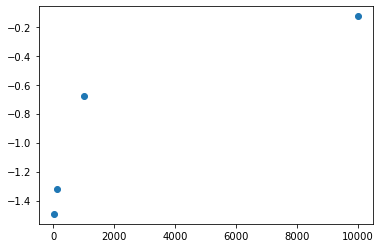

In [27]:
plt.scatter(alphas,weight[:,0]) 
# You want all rows and single column and loop this you will get the plot of every features

In [28]:
weight[:,0]

array([-1.49206312, -1.32026209, -0.67983134, -0.12773037])

Text(0.5, 0, 'alpha')

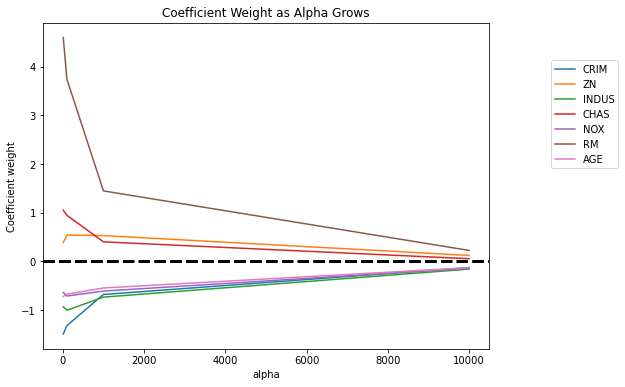

In [29]:
plt.figure(figsize = (8,6))
for i in range(weight.shape[1]):
    plt.plot(alphas,weight[:,i],label = features[i])
    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)
    
# manually specify the coordinate of the legend
plt.legend(bbox_to_anchor = (1.3, 0.9)) # this arument basically puts the legned out of the plotbox 
plt.title('Coefficient Weight as Alpha Grows')
plt.ylabel('Coefficient weight')
plt.xlabel('alpha')   

In [38]:
lasso = Lasso(alpha = 0.01, fit_intercept = True)
lasso.fit(X_train,y_train)
lasso.coef_

array([-0.16896977,  0.01583014, -0.15282119,  3.75664651, -2.99060683,
        6.85218972, -0.02942346])

In [75]:
alphas = [0.01, 0.1, 1, 5, 8]
lasso_weight = []
for alpha in alphas:
    lasso = Lasso(alpha = alpha, fit_intercept = True)
    lasso.fit(X_train,y_train)
    lasso_weight.append(lasso.coef_)
print(lasso_weight)    

[array([-0.18420851,  0.00908152, -0.16886115,  5.64916517, -3.42980624,
        7.10162303, -0.02205152]), array([-0.19277909,  0.01128293, -0.19295893,  4.27604911, -0.        ,
        6.978786  , -0.02615794]), array([-0.20365527,  0.02316812, -0.21301136,  0.        , -0.        ,
        5.18342138, -0.02200726]), array([-0.18713713,  0.04965197, -0.26392639,  0.        , -0.        ,
        0.        , -0.02681443]), array([-0.15815092,  0.05097321, -0.18248522,  0.        , -0.        ,
        0.        , -0.0382763 ])]


In [76]:
lasso_weight=np.array(lasso_weight)

In [77]:
lasso_weight.shape

(5, 7)

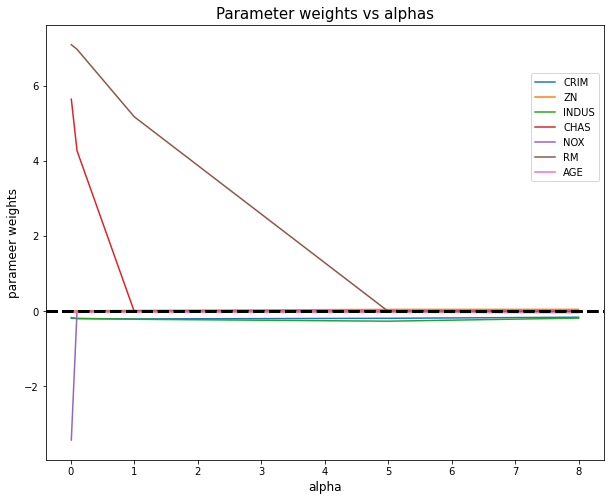

In [102]:
plt.figure(figsize = (10,8))
for i in range(7):
    plt.plot(alphas,lasso_weight[:,i],label = boston.feature_names[i])
    plt.axhline(0, color = 'black', linestyle = '--',linewidth = 3)
    plt.legend(bbox_to_anchor = (1,0.9))
    plt.title('Parameter weights vs alphas',fontsize = 15)
    plt.xlabel('alpha',fontsize = 12)
    plt.ylabel('parameer weights',fontsize = 12)
plt.show()

In [61]:
boston.feature_names[0]

'CRIM'